In [1]:
!pip install git+https://github.com/rcmalli/keras-vggface.git
# Check the successful of the installation
!pip install keras_vggface
!pip show keras-vggface
!pip install keras_applications
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-tgcjtbyc
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-tgcjtbyc
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: scipy, six, numpy, h5py, pillow, keras, pyyaml
Required-by: 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from keras_vggface.vggface import VGGFace

In [3]:
# Based models
#vggface = VGGFace(model=‘vgg16')
vggface = VGGFace(model='resnet50')
#vggface = VGGFace(model='senet50')

In [4]:
from keras.layers import Dense,GlobalAveragePooling2D,Flatten
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

num_classes = 20

vgg_model = VGGFace(include_top=False, input_shape=(224, 224, 3))
last_layer = vgg_model.get_layer('pool5').output
x = Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='classifier')(x)
custom_vgg_model = Model(vgg_model.input, out)
custom_vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0     

In [5]:
img_rows, img_cols = 224, 224
input_shape = (img_rows, img_cols, 3)
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset/gt_db_train_FaceLocal/',target_size=(img_rows,img_cols),batch_size=20,class_mode='categorical', shuffle=True)
step_size_train=train_generator.n/train_generator.batch_size
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset/gt_db_val_FaceLocal/',target_size=(img_rows,img_cols),batch_size=20,class_mode='categorical', shuffle=True)
step_size_val=val_generator.n/val_generator.batch_size

Found 200 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [6]:
import keras
from keras.optimizers import SGD, Adam
adam = Adam(lr=0.0003)
custom_vgg_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
history = custom_vgg_model.fit_generator(generator=train_generator, steps_per_epoch=step_size_train,epochs=10,
                                         validation_data=val_generator, validation_steps=step_size_val)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


10/10 [==============================] - 12s 476ms/step - loss: 2.6019 - accuracy: 0.2650 - val_loss: 1.1333 - val_accuracy: 0.6800
Epoch 2/10
10/10 [==============================] - 4s 360ms/step - loss: 0.7478 - accuracy: 0.8150 - val_loss: 0.8511 - val_accuracy: 0.8100
Epoch 3/10
10/10 [==============================] - 4s 361ms/step - loss: 0.2559 - accuracy: 0.9500 - val_loss: 1.2593 - val_accuracy: 0.7800
Epoch 4/10
10/10 [==============================] - 4s 361ms/step - loss: 0.2398 - accuracy: 0.9150 - val_loss: 0.4993 - val_accuracy: 0.8400
Epoch 5/10
10/10 [==============================] - 4s 363ms/step - loss: 0.0581 - accuracy: 0.9750 - val_loss: 0.2394 - val_accuracy: 0.8900
Epoch 6/10
10/10 [==============================] - 4s 363ms/step - loss: 0.0650 - accuracy: 0.9850 - val_loss: 0.5507 - val_accuracy: 0.8700
Epoch 7/10
10/10 [==============================] - 4s 363ms/step - loss: 0.0632 - accuracy: 0.9750 - val_loss: 0.4869 - val_accuracy: 0.8500
Epoch 8/10
10/10

# Act L9.2: VGG2 (softmax)

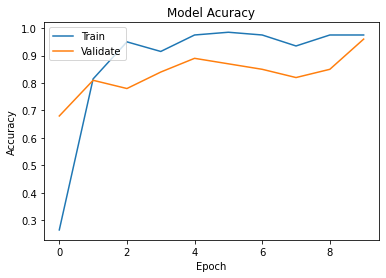

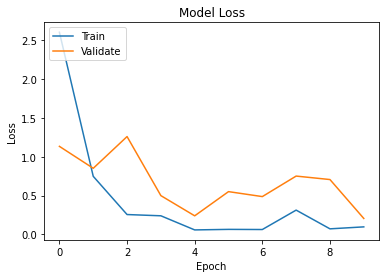

In [7]:
import matplotlib
import matplotlib.pyplot as plt

# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validate'], loc='upper left')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/dataset/Accuracy.png')
plt.show()

# Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validate'], loc='upper left')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/dataset/Loss.png')
plt.show()

# Act L9.3: VGG2 (softmax)

In [8]:
nb_class = 20

vgg_model = VGGFace(include_top=False, input_shape=(224, 224, 3))
last_layer = vgg_model.get_layer('pool5').output
x = Flatten(name='flatten')(last_layer)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
out = Dense(nb_class, activation='softmax', name='classifier')(x)
custom_vgg_model = Model(vgg_model.input, out)
custom_vgg_model.summary()
for layer in custom_vgg_model.layers[:20]:
  layer.trainable=False
for layer in custom_vgg_model.layers[20:]:
  layer.trainable=True

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0   

In [9]:
img_rows, img_cols = 224, 224
input_shape = (img_rows, img_cols, 3)
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset/gt_db_train_FaceLocal/',target_size=(img_rows,img_cols),batch_size=20,class_mode='categorical', shuffle=True)
step_size_train=train_generator.n/train_generator.batch_size
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset/gt_db_val_FaceLocal/',target_size=(img_rows,img_cols),batch_size=20,class_mode='categorical', shuffle=True)
step_size_val=val_generator.n/val_generator.batch_size

Found 200 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [10]:
import keras
from keras.optimizers import SGD, Adam
adam = Adam(lr=0.0003)
custom_vgg_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
history = custom_vgg_model.fit_generator(generator=train_generator, steps_per_epoch=step_size_train,epochs=10,
                                         validation_data=val_generator, validation_steps=step_size_val)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


10/10 [==============================] - 3s 220ms/step - loss: 2.4133 - accuracy: 0.5550 - val_loss: 1.3973 - val_accuracy: 0.9700
Epoch 2/10
10/10 [==============================] - 2s 190ms/step - loss: 0.5811 - accuracy: 1.0000 - val_loss: 0.3589 - val_accuracy: 0.9900
Epoch 3/10
10/10 [==============================] - 2s 193ms/step - loss: 0.0687 - accuracy: 1.0000 - val_loss: 0.1205 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 2s 196ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0975 - val_accuracy: 0.9900
Epoch 5/10
10/10 [==============================] - 2s 191ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0729 - val_accuracy: 0.9900
Epoch 6/10
10/10 [==============================] - 2s 197ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0626 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 2s 208ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0577 - val_accuracy: 1.0000
Epoch 8/10
10/10 

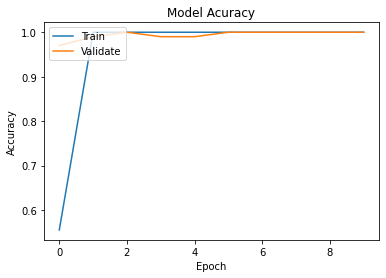

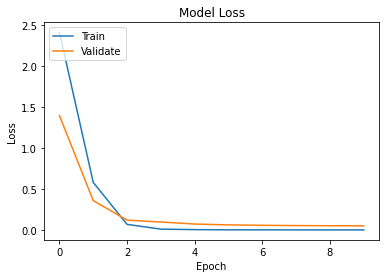

In [11]:
import matplotlib
import matplotlib.pyplot as plt

# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validate'], loc='upper left')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/dataset/Accuracy.png')
plt.show()

# Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validate'], loc='upper left')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/dataset/Loss.png')
plt.show()

# Act L9.4: CNN as a Feature Extraction

In [16]:
#Load model
from keras_vggface.vggface import VGGFace
from keras.models import Model

vggface = VGGFace(model='senet50')
vggface.summary()
layer_name = 'reshape_2'
#intermediate_layer_model = Model(inputs=vggface.input, outputs=vggface.get_layer(layer_name).output)
intermediate_layer_model = custom_vgg_model

Model: "vggface_senet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1/7x7_s2 (Conv2D)          (None, 112, 112, 64  9408        ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 conv1/7x7_s2/bn (BatchNormaliz  (None, 112, 112, 64  256        ['conv1/7x7_s2[0][0]']           
 ation)                         )                                                   

In [17]:
#Prepare data
import numpy as np
import os
from tensorflow.keras.preprocessing import image

data_folder_path = f"/content/drive/MyDrive/Colab Notebooks/dataset/gt_db_val_FaceLocal/"
dirs = os.listdir(data_folder_path)
img_rows, img_cols = 224, 224

data_list = []
label_list = []
label = 0

for dir_name in dirs:
  subject_dir_path = data_folder_path + dir_name
  print(subject_dir_path)
  subject_images_names = os.listdir(subject_dir_path)
  for image_name in subject_images_names:
    image_path = subject_dir_path + "/" + image_name
    img = image.load_img(image_path , target_size=(img_rows, img_cols))
    x = image.img_to_array(img)
    data_list.append(x)
    label_list.append(int(label))
  label += 1

data = np.array(data_list)
label = np.array(label_list)
data = data.astype('float32')
data /= 255
print(data.shape[0])

/content/drive/MyDrive/Colab Notebooks/dataset/gt_db_val_FaceLocal/s01
/content/drive/MyDrive/Colab Notebooks/dataset/gt_db_val_FaceLocal/s02
/content/drive/MyDrive/Colab Notebooks/dataset/gt_db_val_FaceLocal/s03
/content/drive/MyDrive/Colab Notebooks/dataset/gt_db_val_FaceLocal/s04
/content/drive/MyDrive/Colab Notebooks/dataset/gt_db_val_FaceLocal/s05
/content/drive/MyDrive/Colab Notebooks/dataset/gt_db_val_FaceLocal/s06
/content/drive/MyDrive/Colab Notebooks/dataset/gt_db_val_FaceLocal/s07
/content/drive/MyDrive/Colab Notebooks/dataset/gt_db_val_FaceLocal/s08
/content/drive/MyDrive/Colab Notebooks/dataset/gt_db_val_FaceLocal/s09
/content/drive/MyDrive/Colab Notebooks/dataset/gt_db_val_FaceLocal/s10
/content/drive/MyDrive/Colab Notebooks/dataset/gt_db_val_FaceLocal/s11
/content/drive/MyDrive/Colab Notebooks/dataset/gt_db_val_FaceLocal/s12
/content/drive/MyDrive/Colab Notebooks/dataset/gt_db_val_FaceLocal/s13
/content/drive/MyDrive/Colab Notebooks/dataset/gt_db_val_FaceLocal/s14
/conte

In [18]:
#Extract Features
import numpy as np

feature = []

for i in range(0,data.shape[0]):
  x = np.expand_dims(data[i], axis=0)
  feat = intermediate_layer_model.predict(x)
  feat_feature = np.array(feat).flatten()
  feature.append(feat_feature)

1/1 [==============================] - 0s 26ms/step


In [19]:
#N:N Checking
# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

sim = cosine_similarity(feature, feature)
acc = 0

for i in range(0,data.shape[0]):
  print("Compare", i)
  closet_value = -1
  closet_ID = 0
  for j in range(0,data.shape[0]):
    if i==j:
      continue
    if sim[i][j] > closet_value:
      closet_value = sim[i][j]
      closet_ID = j
  if label[i] == label[closet_ID]:
    acc = acc+1

acc = acc*100/data.shape[0]
print("End ", acc, " %")

Compare 0
Compare 1
Compare 2
Compare 3
Compare 4
Compare 5
Compare 6
Compare 7
Compare 8
Compare 9
Compare 10
Compare 11
Compare 12
Compare 13
Compare 14
Compare 15
Compare 16
Compare 17
Compare 18
Compare 19
Compare 20
Compare 21
Compare 22
Compare 23
Compare 24
Compare 25
Compare 26
Compare 27
Compare 28
Compare 29
Compare 30
Compare 31
Compare 32
Compare 33
Compare 34
Compare 35
Compare 36
Compare 37
Compare 38
Compare 39
Compare 40
Compare 41
Compare 42
Compare 43
Compare 44
Compare 45
Compare 46
Compare 47
Compare 48
Compare 49
Compare 50
Compare 51
Compare 52
Compare 53
Compare 54
Compare 55
Compare 56
Compare 57
Compare 58
Compare 59
Compare 60
Compare 61
Compare 62
Compare 63
Compare 64
Compare 65
Compare 66
Compare 67
Compare 68
Compare 69
Compare 70
Compare 71
Compare 72
Compare 73
Compare 74
Compare 75
Compare 76
Compare 77
Compare 78
Compare 79
Compare 80
Compare 81
Compare 82
Compare 83
Compare 84
Compare 85
Compare 86
Compare 87
Compare 88
Compare 89
Compare 90
Compare 9